In [1]:
# step 1: can I plot the KIC distributions?
# did I even save these data?

# for GALAH I have the GALAH allstar catalog
# for KICs, what did I use??
# I think I had 9,000 exoplanet candidates from exoFOP
# I should get these now
# it looks like I was using the Gaia KICs, maybe this is from the Gaia-Kepler xmatch?
# and then I can use the Gaia-GALAH xmatch?
# but then it might be hard to find an APOGEE-Gaia xmatch...or maybe that will be easy

In [4]:
from astropy.table import Table
%pylab inline
kepler = Table.read('./data/literature_tables/kepler_dr3_good.fits', format='fits').to_pandas()
kepler.columns

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


Index(['kepid', 'ra_kic', 'dec_kic', 'source_id', 'random_index', 'ra', 'dec',
       'parallax', 'parallax_error', 'parallax_over_error', 'pmra',
       'pmra_error', 'pmdec', 'pmdec_error', 'astrometric_params_solved',
       'pseudocolour', 'pseudocolour_error', 'ipd_frac_multi_peak',
       'ipd_frac_odd_win', 'ruwe', 'phot_g_mean_flux_over_error',
       'phot_g_mean_mag', 'phot_bp_mean_flux_over_error', 'phot_bp_mean_mag',
       'phot_rp_mean_flux_over_error', 'phot_rp_mean_mag',
       'phot_bp_rp_excess_factor', 'bp_rp', 'radial_velocity',
       'radial_velocity_error', 'rv_nb_transits', 'rv_expected_sig_to_noise',
       'rv_renormalised_gof', 'rv_chisq_pvalue', 'phot_variable_flag', 'l',
       'b', 'in_qso_candidates', 'in_galaxy_candidates', 'non_single_star',
       'has_xp_continuous', 'has_xp_sampled', 'has_rvs',
       'has_epoch_photometry', 'has_epoch_rv', 'has_mcmc_gspphot',
       'has_mcmc_msc', 'in_andromeda_survey', 'teff_gspphot', 'logg_gspphot',
       'mh_gs

In [14]:
# okay now I need to plot GALAH
# can I do this with the xmatch?
# GALAH DR3 main catalog
import pandas as pd
galah_allstar_catalog = Table.read('./data/galah_catalogs/GALAH_DR3_main_allstar_v2.fits', format='fits').to_pandas()
# GALAH Gaia crossmatch for all spectra 
galah_gaia_xmatch = Table.read('./data/galah_catalogs/GALAH_DR3_VAC_GaiaEDR3_v2.fits', format='fits').to_pandas()

galah_stars_gaia = pd.merge(
    galah_gaia_xmatch, 
    galah_allstar_catalog, 
    on='sobject_id')
galah_stars_gaia = galah_stars_gaia.drop_duplicates(subset='designation', keep='first')
galah_stars_gaia = galah_stars_gaia[galah_stars_gaia.designation!=' ']

In [ ]:
# I'm just going to use this table
# and then at the meeting I can just say that...

In [22]:
tbl = Table.read('./data/literature_tables/allStar-dr17-synspec-gaiadr3-gaiasourcelite.fits').to_pandas()

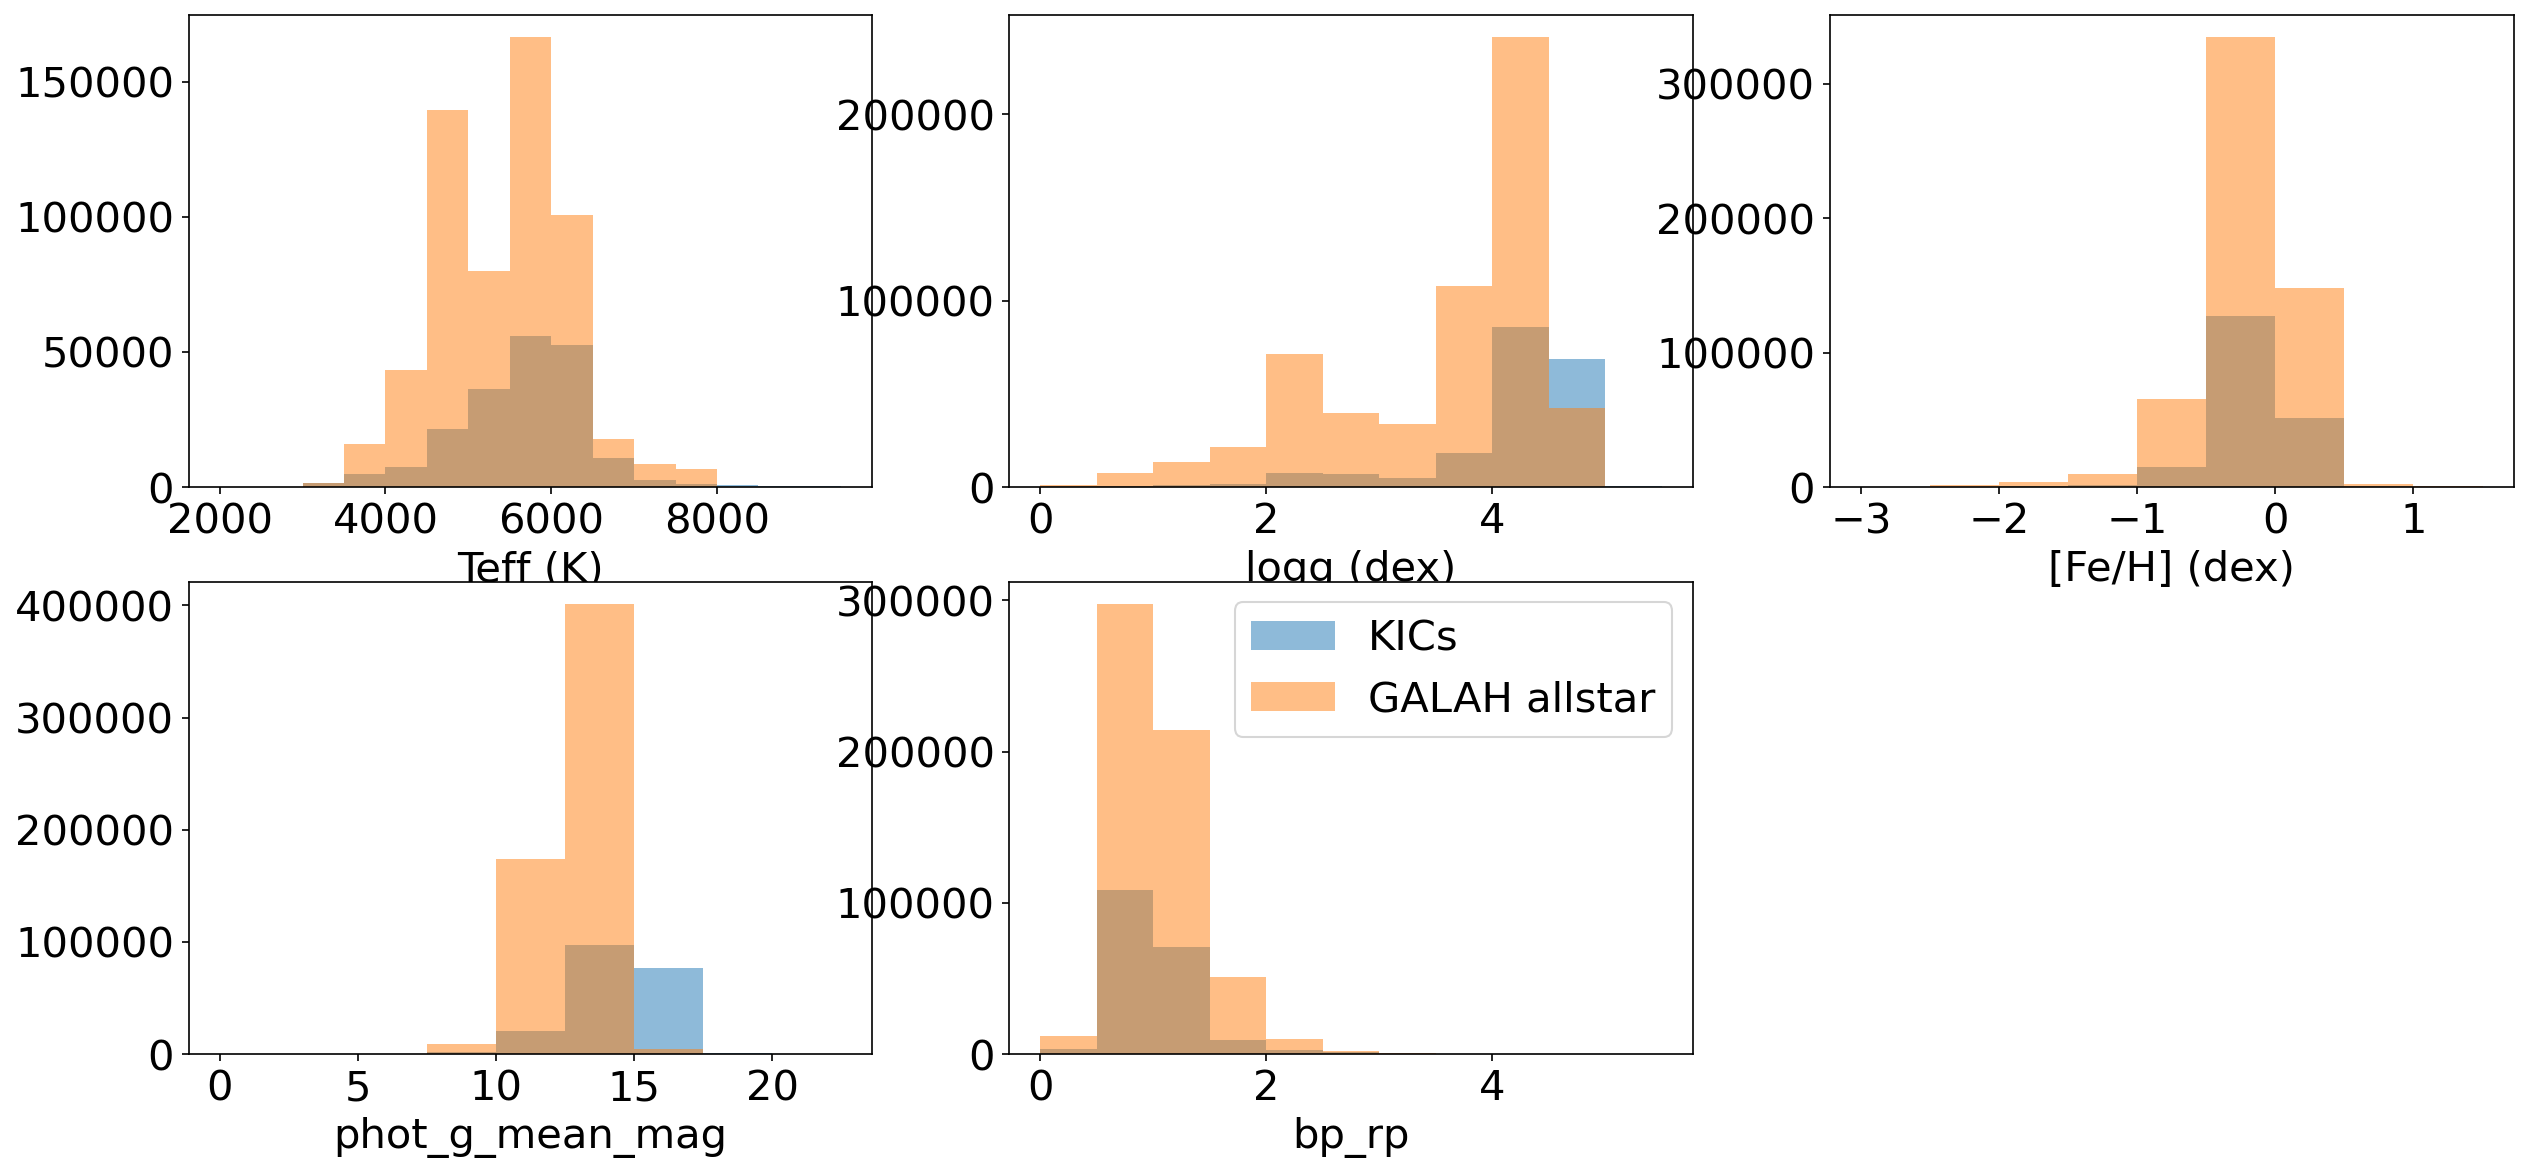

In [45]:
# okay now it's time to plot them on top of each other.
teff_bins = np.arange(2000,10000,500)
logg_bins = np.arange(0,6,0.5)
feh_bins = np.arange(-3,2,0.5)
gmag_bins = np.arange(0,25,2.5)
bprp_bins = np.arange(0,6,0.5)

rcParams['font.size']=20
figure(figsize=(20,9))
subplot(231);xlabel('Teff (K)')
hist(kepler.teff, bins=teff_bins, alpha=0.5)
hist(galah_stars_gaia.teff, bins=teff_bins, alpha=0.5)

subplot(232);xlabel('logg (dex)')
hist(kepler.logg, bins=logg_bins, alpha=0.5)
hist(galah_stars_gaia.logg, bins=logg_bins, alpha=0.5)

subplot(233);xlabel('[Fe/H] (dex)')
hist(kepler.feh, bins=feh_bins, alpha=0.5)
hist(galah_stars_gaia.fe_h, bins=feh_bins, alpha=0.5)

subplot(234);xlabel('phot_g_mean_mag')
hist(kepler.phot_g_mean_mag, bins=gmag_bins, alpha=0.5)
hist(galah_stars_gaia.phot_g_mean_mag, bins=gmag_bins, alpha=0.5)

subplot(235);xlabel('bp_rp')
hist(kepler.bp_rp, bins=bprp_bins, alpha=0.5, label='KICs')
hist(galah_stars_gaia.bp_rp, bins=bprp_bins, alpha=0.5, label='GALAH allstar')
legend(loc='upper right')

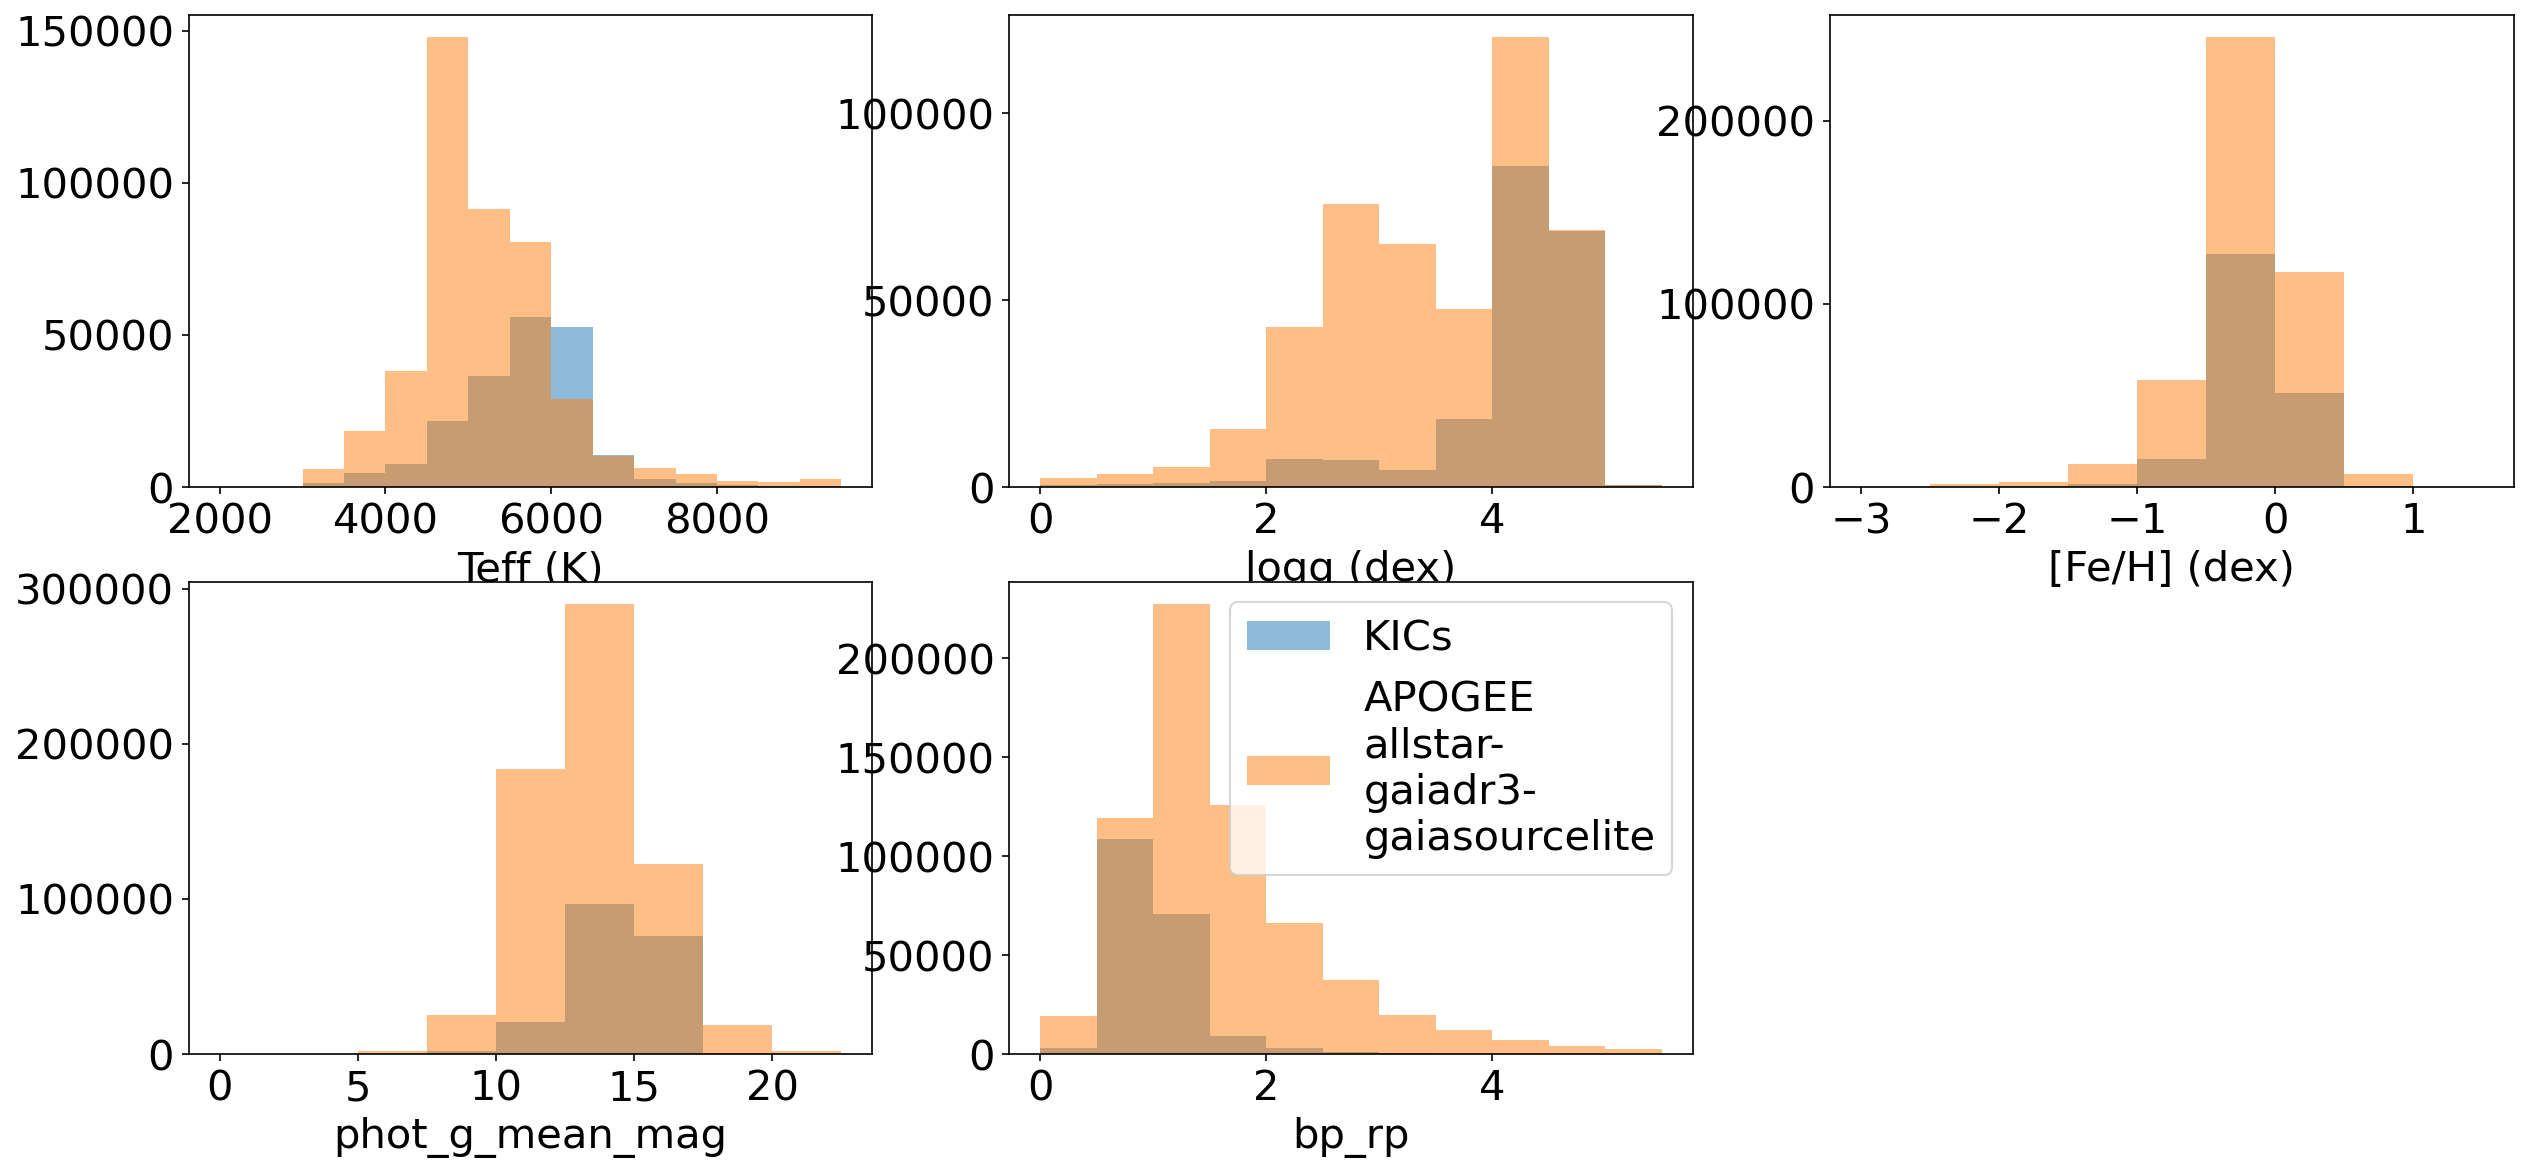

In [48]:
rcParams['font.size']=20
figure(figsize=(20,9))
subplot(231);xlabel('Teff (K)')
hist(kepler.teff, bins=teff_bins, alpha=0.5)
hist(tbl.teff_gspphot, bins=teff_bins, alpha=0.5)
subplot(232);xlabel('logg (dex)')
hist(kepler.logg, bins=logg_bins, alpha=0.5)
hist(tbl.logg_gspphot, bins=logg_bins, alpha=0.5)
subplot(233);xlabel('[Fe/H] (dex)')
hist(kepler.feh, bins=feh_bins, alpha=0.5)
hist(tbl.mh_gspphot, bins=feh_bins, alpha=0.5)
subplot(234);xlabel('phot_g_mean_mag')
hist(kepler.phot_g_mean_mag, bins=gmag_bins, alpha=0.5)
hist(tbl.phot_g_mean_mag, bins=gmag_bins, alpha=0.5)
subplot(235);xlabel('bp_rp')
hist(kepler.bp_rp, bins=bprp_bins, alpha=0.5, label='KICs')
hist(tbl.bp_rp, bins=bprp_bins, alpha=0.5, label='APOGEE\nallstar-\ngaiadr3-\ngaiasourcelite')
legend()